In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
from tensorflow.python.client import device_lib

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, BatchNormalization, Convolution2D, MaxPool2D
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import backend as K

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [4]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0" # Will use only the first GPU device

In [5]:
tf.__version__

'2.1.0'

In [6]:
keras.__version__

'2.2.4-tf'

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
train.shape

(42000, 785)

In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test.shape

(28000, 784)

In [11]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x_train = (train.iloc[:,1:].values).astype('float32')
y_train = train.iloc[:,0].values.astype('int32')
x_test = test.values.astype('float32')

In [13]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)

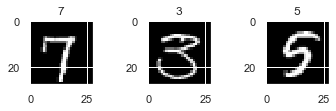

In [15]:
for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [16]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [17]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [18]:
x_train.shape

(42000, 28, 28, 1)

In [19]:
x_test.shape

(28000, 28, 28, 1)

In [20]:
mean_px = x_train.mean().astype('float32')
std_px = x_train.std().astype('float32')

def standardize(x):
    return (x-mean_px)/std_px

In [21]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

c:\users\wonhee\anaconda3\envs\tensorgpu211\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


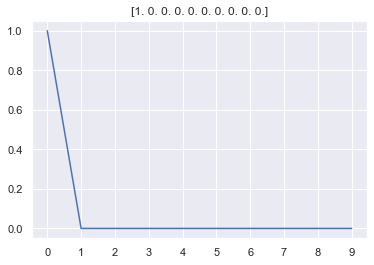

In [22]:
plt.title(y_train[200])
plt.plot(y_train[200])
plt.xticks(range(10));
plt.show()

In [22]:
seed = 43
np.random.seed(seed)

In [24]:
model = Sequential()
model.add(Lambda(standardize, input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

print('input layer', model.input_shape)
print('output_layer', model.output_shape)

input layer (None, 28, 28, 1)
output_layer (None, 10)


In [25]:
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
gen = ImageDataGenerator()

In [24]:
X = x_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state = 42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [28]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=4, validation_data = val_batches, validation_steps = val_batches.n)

Epoch 1/4
  138/37800 [..............................] - ETA: 18:29 - loss: 0.7633 - accuracy: 0.7625

KeyboardInterrupt: 

In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0, 0.5, 'Losses')

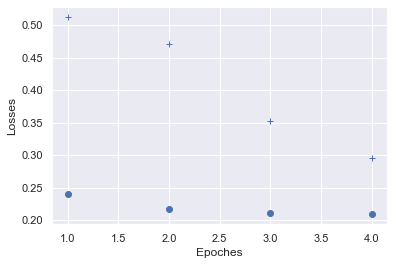

In [35]:
losses = history_dict['loss']
val_losses = history_dict['val_loss']
epoches = range(1, len(val_losses)+1)

plt.plot(epoches, losses, 'bo')
plt.plot(epoches, val_losses, 'b+')
plt.xlabel('Epoches')
plt.ylabel('Losses')

Text(0, 0.5, 'Accuracy')

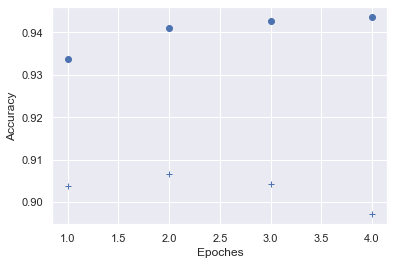

In [36]:
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

plt.plot(epoches, accuracy, 'bo')
plt.plot(epoches, val_accuracy, 'b+')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')

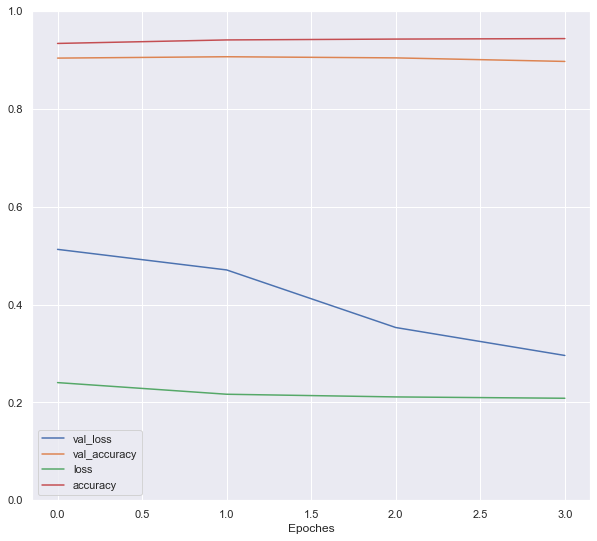

In [39]:
pd.DataFrame(history.history).plot(figsize=(10, 9))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoches')
plt.show()

In [40]:
def fully_connected_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28, 28, 1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='Adam'(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [43]:
fc = fully_connected_model()

In [45]:
history = fc.fit_generator(generator = batches, steps_per_epoch = batches.n, epochs=2, validation_data = val_batches, validation_steps = val_batches.n)

Epoch 1/2
37800/37800 [==============================] - 224s 6ms/step - loss: 0.0157 - accuracy: 0.9952 - val_loss: 0.2278 - val_accuracy: 0.9769
Epoch 2/2
37800/37800 [==============================] - 226s 6ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.2391 - val_accuracy: 0.9824


In [46]:
history2_dict = history.history
history2_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

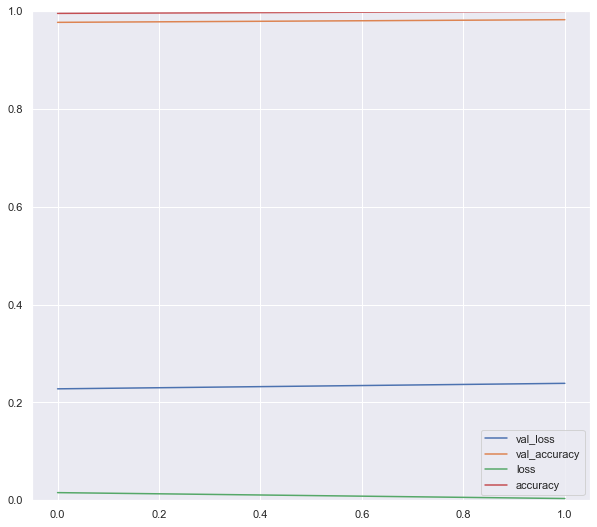

In [47]:
pd.DataFrame(history2_dict).plot(figsize=(10, 9))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [48]:
fc.save('Fully Connected Layer.h5')

In [27]:
with tf.device("/device:GPU:0"):
    def cnn_model():
        model = Sequential([
            Lambda(standardize, input_shape=(28,28, 1)),
            Convolution2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
            Convolution2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
            MaxPool2D(pool_size=(2,2)),
            Dropout(0.25),
            Convolution2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
            Convolution2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
            MaxPool2D(pool_size=(2,2), strides=(2,2)),
            Dropout(0.25),
            Flatten(),
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(10, activation='softmax')
        ])

        optimizer=RMSprop(lr=0.001)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        return model
    

In [28]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

In [29]:
cnn_model = cnn_model()

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X, y, batch_size=86)
history=cnn_model.fit_generator(generator=batches, steps_per_epoch=batches.n, validation_data = (X_val, y_val), epochs=8, callbacks=[learning_rate_reduction])

Epoch 1/8
 7703/42000 [====>.........................] - ETA: 10:34 - loss: 0.0760 - accuracy: 0.9777

In [29]:
cnn_model.save('CNN 2x2 2x2 epoch4 batch100.h5')

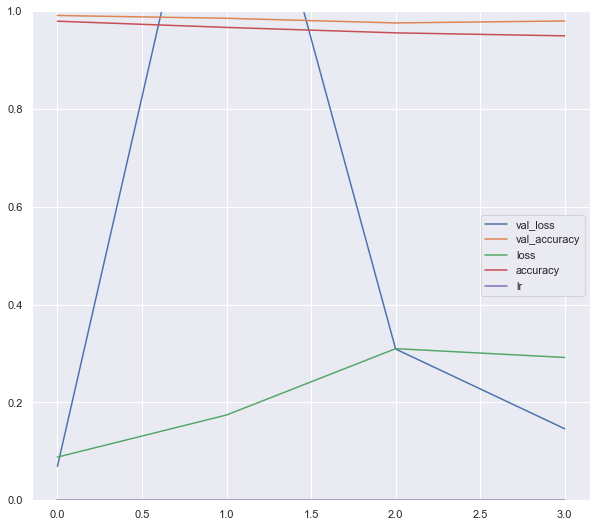

In [31]:
cnn_history = history.history
pd.DataFrame(cnn_history).plot(figsize=(10, 9))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
cnn_history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])

Text(0, 0.5, 'Losses')

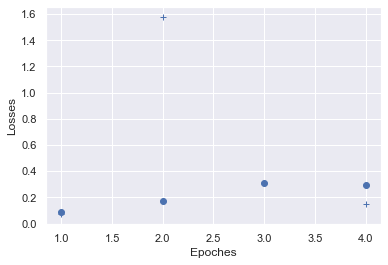

In [34]:
losses = cnn_history['loss']
val_losses = cnn_history['val_loss']
epochs = range(1, len(val_losses)+1)

plt.plot(epochs, losses, 'bo')
plt.plot(epochs, val_losses, 'b+')
plt.xlabel('Epoches')
plt.ylabel('Losses')

Text(0, 0.5, 'Accuracy')

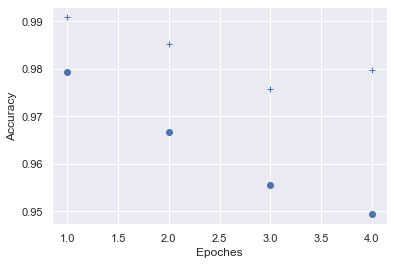

In [37]:
accuracy = cnn_history['accuracy']
val_accuracy = cnn_history['val_accuracy']
epochs = range(1, len(val_losses)+1)

plt.plot(epochs, accuracy, 'bo')
plt.plot(epochs, val_accuracy, 'b+')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')

In [38]:
finalmodels = cnn_model.predict_classes(x_test, verbose=0)

In [39]:
submissions = pd.DataFrame({"ImageId": list(range(1, len(finalmodels)+1)), "Label": finalmodels})
submissions.to_csv("submissionCNN22223004.csv", index=False, header=True)